# Documentation #006
This week's documentation is a follow up of the previous one and also will set a frame for a discussion this week. I've been able to get a brief idea of how things work up to HMC, am currently working on the math, probably will get it done within this week and move to NUTS.

First, some definitions:
1. Statistical inference - The process of using data analysis to deduce properties of an underlying probability distribution.
2. Probabilistic inference - The process of deriving the probability of one or more random variables taking a specific value or set of values.

I'll be using figures from [Michal Betancourt's paper](https://arxiv.org/pdf/1701.02434.pdf) to aid explanations.

## Role of Bayesian Theorem in Bayesian Inference
* Our aim is to use Bayesian inference to determine parameters from empirical data.
* As highlighted from the previous documentation, Bayesian statistical inference requires an input of a prior distribution for the parameters. It tells us everything about the system, embodies judgement of how plausible that parameters could have certain values in various regions of the parameter space, BEFORE ANY MEASUREMENTS ARE TAKEN.
$$\begin{align*}
Prior\; distribution
&=P(\theta_1,...,\theta_p)\\
&=\varphi(\theta)
\end{align*}$$

* Combining a prior distribution (for the parameters) with the conditional distribution (for the observed data), we get a joint distribution for all quantities related to the problem by the Bayes Theorem.
$$\begin{align*}
P(\theta_1,...,\theta_p,x_1,...,x_n)
&= P(\theta_1,...,\theta_p)P(x_1,...,x_n\vert \theta_1,...,\theta_p)\\
&= \varphi(\theta) \prod P(x_i\vert \theta).
\end{align*}$$

* The likelihood function $P(x_1,x_2,...\vert \theta_1,...,\theta_p)=\prod P(x_i\vert \theta)$ derived from the joint distribution above tells us about what we learned from the measurement. This is a function of $\theta$, and encapsulates the relative abilities of the various parameter values to describe the observed data, can be considered a measure of plausibility of the parameter values with the inclusion of the data.
* By defining a joint distribution for both the parameters and the observable data, the Bayesian approach reduces statistical inference to probabilistic inference.
* When we condition on observed data, we can obtain a posterior probability distribution for the parameters and for future observations (predictive distribution).
$$\begin{align*}
Posterior\; distribution
&= P(\theta \vert x_1,...,x_n)\\
&= \cfrac{P(\theta,x_1,...,x_n)}{P(x_1,...,x_n)}\\
&= \cfrac{\varphi(\theta)\prod P(x_i\vert \theta)}{\int P(\theta)\prod P(x_i\vert \theta) d\theta}
\end{align*}$$
* Expressing as a proportionality in terms of likelihood, $$P(\theta \vert x_1,...,x_n)\propto \varphi(\theta)\prod P(x_i\vert \theta) \propto \varphi(\theta)L(\theta \vert x_1,...,x_n).$$
* In Bayesian inference, all information about a system is quantified by a posterior distribution. In other words, the posterior distribution is the "currency" of Bayesian inference. It tells us everything about the system after every measurement is taken.
* By using the result from the previous documentation such that $$P\left( y \vert x \right)=\int P(y,\theta \enspace \vert x)d\theta=\int P(y \enspace \vert \theta,x)P(\theta \vert x)d\theta$$ the predictive distribution for an unobserved case $x_{n+1}$ given values observed for $x_1,...,x_n$ is $$Predictive\; distribution =P(x_{n+1}\vert x_1,...,x_n)=\int P(x_{n+1}\vert \theta)P(\theta \vert x_1,...,x_n)d\theta .$$
* The predictive distribution can also be viewed as the EXPECTATION of $P(x_{n+1}\vert \theta)$ with respect to the posterior distribution for $\theta$.
* Any statistical queries are answered by computing expectations with respect to the posterior distribution, since it contains all the information of the system.

Unlike classical methods, Bayesian predictive distribution is not based on a single estimate for the parameters, instead it is an average of the predictions using all possible values of the parameters, with each prediction weighed by the probability of the parameters having those values (Neal, 1993).

## Expectation
* Often than not, flexible models come with a price such that their probability distributions can be very complex, especially those with probabilities varying greatly over high dimensional space. We might not be able to fully characterize them analytically.
* According to Michael Betancourt, the one and only thing you can do with a probability distribution, mathematically speaking, is to compute expectations. I quote his saying "expectations are the only thing that makes sense" (due to probability mass vs probability density and subsequently leading us to the typical set, will briefly discuss during meet-up).

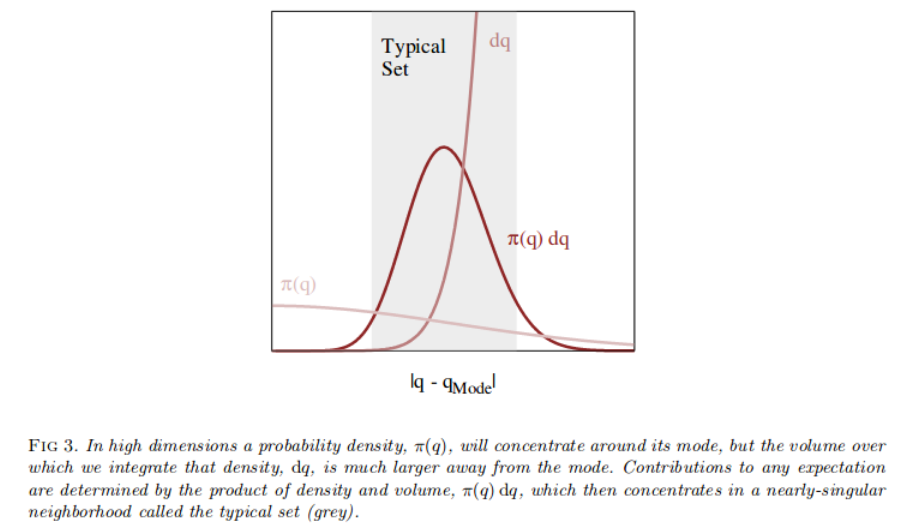

In [2]:
from IPython.display import Image
Image(filename='img/betancourt_expectation.png')

* In general, contributions to any expectation are determined by the product of density and volume (probability mass), in our case $P(\theta \vert x_1,...,x_n)d\theta$, which then concentrates in a neighbourhood called the TYPICAL SET.
* As shown from above, all well-posed Bayesian computations reduce to expectations and, consequently, INTEGRATION.
* Integration, apparently, is very hard, so we need numerical approximation, which is, incredibly difficult. The harderst part of Bayesian inference, is to figure out how to efficiently estimate integrals.
* So far we have managed to describe our problem into a predictive distribution using Bayesian theorem. What we have to do next is, to estimate the parameters and we can achieve that by solving the predictive distribution, which is now an integration problem. From now on, the role of Bayesian theorem ends, and we focus on estimating the predictive distribution (the integration problem), which from hereon we view it as an expectation.
* We need expectation estimation algorithms to focus their computation on the typical set in order to be efficient. One way to do it is to find a way to sort of put a grid on a typical set because high dimensional integration is hard. In high dimensions, typical sets have some singular geometric shape, which is difficult for algorithms to find for it and so need to actively search for it. 

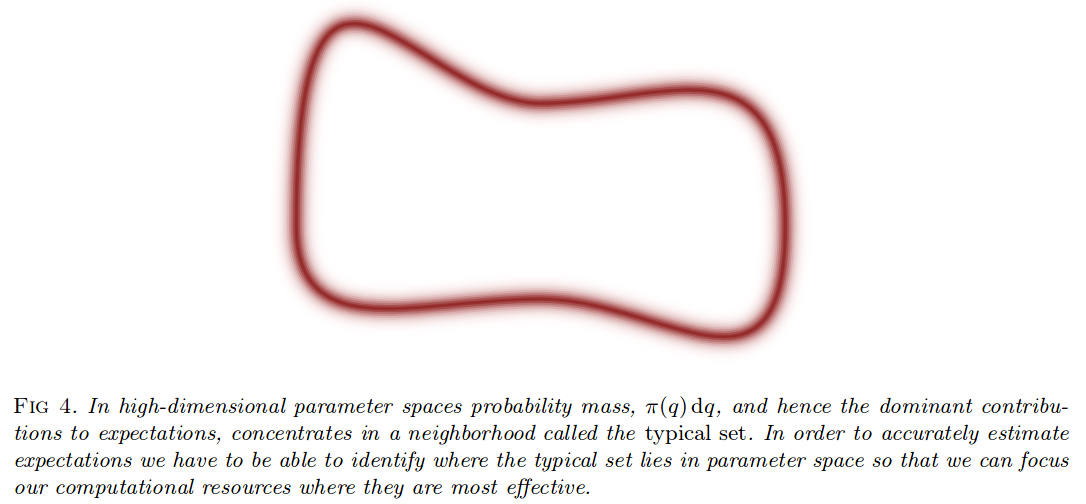

In [3]:
Image(filename='img/betancourt_fig4.png')

## Role of MCMC
To accurately estimate expectations, we need a method for numerically finding and then exploring the typical set. There are deterministic and stochastic ways of doing it such that:
* Deterministic:
    1. Modal Estimators
    2. Laplace Estimators
    3. Variational estimators
    
* Stochastic:
    1. Rejection sampling
    2. Importance sampling
    3. MCMC

We are going to use MCMC.

### Monte Carlo approximation
#### Ordinary Monte Carlo (OMC) - special case of MCMC
If $X_1,X_2,...$ is a stochastic process such that every $X_i$ takes on values $x_1,...,x_n$ and $g$ is a real-valued function on its state space, then the stochastic process $g(X_1), g(X_2), ...$ having state space $\mathbb{R}$ is said to be a functional of $X_1,X_2,...$.

* Suppose we are trying to calculate an expectation $\mu = E\{g(X)\}$, where $g$ is a real-valued function on the state space but we can't do it by exact methods.
* Suppose also we can simulate $X_1, X_2,...$ iid having the same distribution as $X$, we can define $$\hat \mu_n = \cfrac{1}{n} \sum_{i=1}^{n} g(X_i)$$ such that $\hat \mu_n$ is the Monte Carlo approximation or the Monte Carlo calculation of $\mu$ and $n$ the Monte Carlo sample size.

Since our problem is specified by the expectation of $P(x_{n+1}\vert \theta)$ with respect to the posterior distribution for $\theta$,, then the Monte Carlo estimation can be applied to approximate the $\mu$ that we otherwise cannot calculate.

### Markov Chain
* A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event.
* Transition distribution $\mathbb{T}(q'\vert q)$ is a conditional probability that defines to which point we are most likely to jump from initial point $q$ to $q'$.
* An arbitrary Markov chain will wander around in the parameter space and won't be any helpful in estimating expectations, unless we can somewhat engineer the Markov transition distribution such that it preserves the target distribution, then according to Michael, "something magical happens". $$\pi (q)=\int dq' \pi (q')\mathbb{T}(q\vert q').$$
* Using the variable $X$ from above, suppose $X^{(t)}=\{X_1^{(t)},...,X_n^{(t)}\}$ for the set of variables at step $t$, we define the chain with initial distribution $X_0^{(t)}$ and transition probability $\mathbb{T}(X^{(t)}\vert X^{(t-1)})$. The transition probabilites are chosen in a way so that the distribution of $X^{(t)}$ converges to $X$ as $t$ increases. The Markov chain can then be simulated by sampling from the initial distribution, and then subsequently from the conditional transition distributions.
* Repeating the process, no matter where sampling is started, it will soon drift into the typical set and start exploring it. For a sufficiently long enough Markov chain, we will get a complete exploration of the typical set where the grid is on the probability mass and the Markov Chain defines consistent Markov Chain Monte Carlo estimators, then we compute the integrals. 

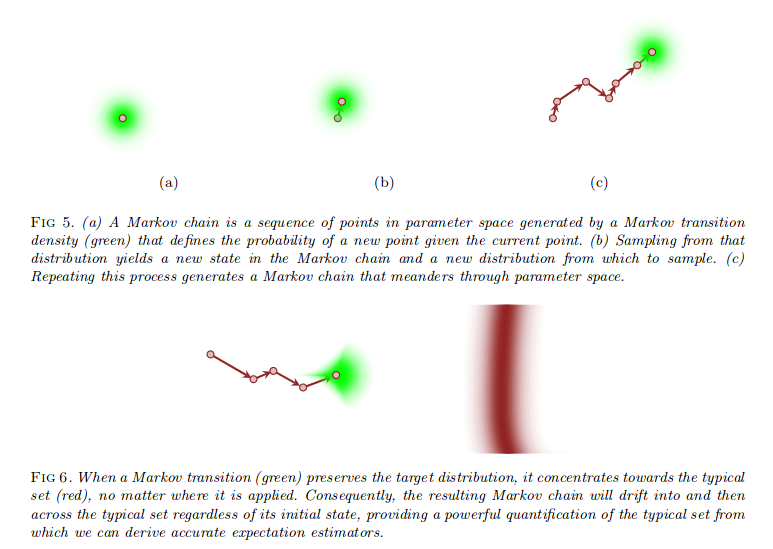

In [4]:
from IPython.display import Image
Image(filename='img/betancourt_markovchain.png')

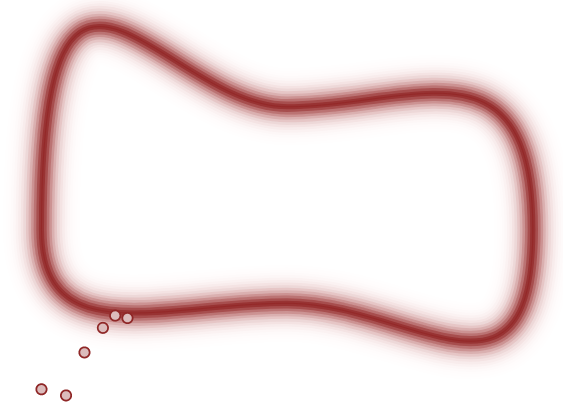

In [7]:
Image(filename='img/betancourt_exploration1.png')

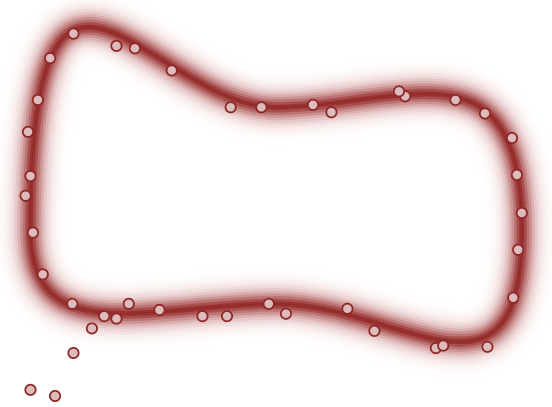

In [8]:
Image(filename='img/betancourt_exploration2.png')

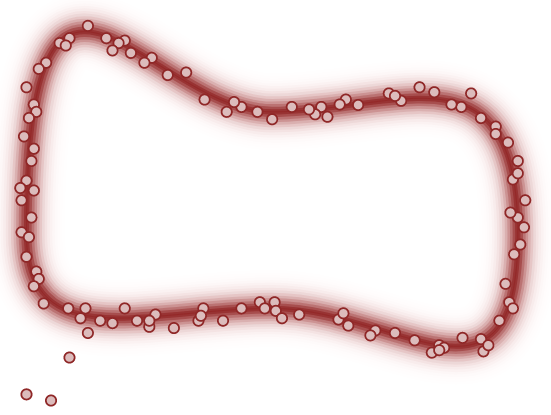

In [9]:
Image(filename='img/betancourt_exploration3.png')

* With sufficient time, the history of the Markov chain becomes a convenient quantification of the typical set, then we can integrate over the history of the Markov chain to approximate integrating over the typical set (the parameter space). Mathematically speaking, estimating the integral means we can just average the functions over the history of the Markov chain.$$\hat g_N = \cfrac{1}{N} \sum_{n=0}^N g(X_n)$$
* Also because we have a nice guarantee of the exploration, this will asymptotically converge to the true expectation value.$$\lim_{N\to\infty}\hat g_N=\mathbb{E}_\pi[g].$$

### Metropolis-Hastings Algorithm - most common methods of generating Markov cains for Monte Carlo estimation, now known as MCMC
* MCMC defines a generic strategy for quantifying the typical set given a Markov transition that targets the desired distribution. But engineering such a transition is a nontrivial problem. Metropolis-Hasting Algorithm (MHA) is one of the various procedures to automatically construct appropriate transitions for any given target distribution.
* There are two steps in the MHA: proposal (stochastic perturbation of the inital state) and correction(rejecting any proposals that stray too far away from the typical set of target distribution).
* Let $\mathbb{Q}(q'\vert q)$ be the proposal density, and the acceptance probability that describes the region of high density mass is $$a(q,q')=min\left(1,\cfrac{\mathbb{Q}(q\vert q')\pi(q')}{\mathbb{Q}(q'\vert q)\pi(q)}\right).$$
* The original MCMC algorithm still commonly in use today, which Michael referred to as the Random Walk Metropolis, has a Gaussian distribution as its proposal mechanism which describes the region of high volume, $$\mathbb{Q}(q'\vert q)=\mathcal{N}(q'\vert q,  \sum).$$
* "Since the proposal mechanism is symmetric under the exchange of the initial and proposed points, the proposal density cancels in the acceptance probability, leaving the simple form,$$a(q,q')=min\left(1,\cfrac{\pi(q')}{\pi(q)}\right)."$$
* The transition probability is $$\mathbb{T}(q'\vert q)=\mathcal{N}(q'\vert q,  \sum) min\left(1,\cfrac{\pi(q')}{\pi(q)}\right).$$
* The ones that can survive this algorithm are those with high probability mass.
* However this naive diffusion explores the higher dimensions inefficiently, hence will give inaccurate results at higher dimensions.
* Also because it explores so slowly, it takes a long time before finding a pathological neighbourhood, which means encountering large curvatures and hinges, as shown in the figure below.

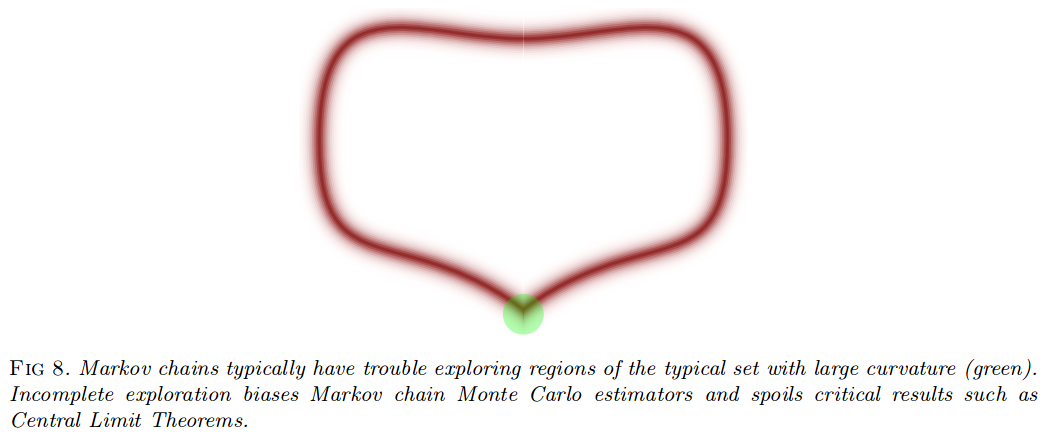

In [3]:
Image(filename='img/betancourt_pathologic.png')

## Problems and remedy of Metropolis-Hasting method and MCMC - Hamiltonian Monte Carlo
* In terms of practical performance, the generality of Metropolis-Hasting and MCMC might not be reasonable. Particularly if the exploration of the target distribution is not complete or convergence is not achieved fast enough, then we might run out of computation resources before being able to generate a large enough sample to get an accurate value of our estimation of expectations.
* We know that MCMC always get us the right answer, but the problem is how to make it converge faster, i.e., more efficiently? 
* In fact, the convergence of MCMC estimators is not always well-behaved, it may encounter pathological behaviors (which arises particularly in high dimensional problems), that is, Markov chains have trouble exploring regions of the typical set with large curvatures and hinges. Incomplete exploration biases the MCMC estimators and results in unreasonable and inaccurate estimates. 
* The Random Walk Metropolis is extremely fragile when it comes to geometric ergodicity since it explores so slowly that it takes a long time to reach a pathological neighbourhood.
* In order to tackle high-dimensional problems we need the coherent exploration of Hamiltonian Monte Carlo - which will be my work for the upcoming week.

## Next course of work
* I've been able to figure out briefly what happens up to HMC from Michael's presentation (link provided at the bottom) but I'm currently working out the math.
* I'm still currently stuck at Markov chain's transition probability, will probably refine this in the next documentation and hopefully be able to also work out HMC's math.

### References
Betancourt, M. (2018). A Conceptual Introduction to Hamiltonian Monte Carlo. Accessible at https://arxiv.org/pdf/1701.02434.pdf.

Betancourt, M. (2018). The Convergence of Markov chain Monte Carlo Methods: From the Metropolis method to Hamiltonian Monte Carlo. Accessible at https://arxiv.org/pdf/1706.01520.pdf.

Brooks, S., Gelman, A., Jones, G. L., Meng, X. L. (2011). Handbook of Markov Chain Monte Carlo, Chapman & Hall/CRC.

Neal, R. M. (1993). Probabilistic Inference Using Markov Chain Monte Carlo Methods Technical Report No. CRG-TR-93-1, Department of Computer Science, University of Toronto.
Accessible at [https://bayes.wustl.edu/Manual/RadfordNeal.review.pdf].

https://www.youtube.com/watch?v=DJ0c7Bm5Djk&t=21140s